En este cuaderno se implementa un modelo de segmentaci√≥n utilizando la arquitectura DeepLabV3+.

Esta arquitectura, consiste en una red convolucional avanzada, especialmente dise√±ada para tareas de segmentaci√≥n de im√°genes. La idea es replicar los pasos que se realizaron en el modelo de U-Net pero aplicando DeepLabV3+, permitiendo la comparativa entre ambas arquitecturas.
> A√±adir blockquote



En el primer paso, se realiza la importaci√≥n de las librer√≠as necesarias para la ejecuci√≥n del cuaderno. Estas librer√≠as pueden ser √∫tiles para el manejo de datos, preprocesamiento de im√°genes, construcci√≥n o entrenamiento del modelo de Inteligencia Artificial (Deep Learning), e incluso la visualizaci√≥n de datos.

In [ ]:
!pip install -U segmentation-models-pytorch albumentations

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 154.8/154.8 kB 3.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 31.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 23.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 27.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [ ]:
#Paso 2: Imports y configuraciones
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
import albumentations as A
from albumentations.pytorch import ToTensorV2
from sklearn.model_selection import train_test_split
import segmentation_models_pytorch as smp

# Configuraci√≥n general
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
BATCH_SIZE = 8
IMG_DIM = 128
EPOCHS = 5

En el siguiente bloque, se realiza la descarga del dataset y descompresi√≥n del conjunto de datos utilizado para la evaluaci√≥n y entrenamiento del modelo. Posteriormente, se har√° la divisi√≥n del conjunto de datos 80% entrenamiento, 20% validaci√≥n. Este paso es principal a la hora de preparar los datos para el entrenamiento de nuestro modelo.

In [ ]:
#Paso 3: Dataset personalizado
class TumorDataset(Dataset):
    def __init__(self, image_paths, mask_paths, transform=None):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = cv2.imread(self.image_paths[idx])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(self.mask_paths[idx], cv2.IMREAD_GRAYSCALE)

        if self.transform:
            augmented = self.transform(image=img, mask=mask)
            img = augmented['image']
            mask = augmented['mask'].unsqueeze(0)  # A√±adir canal
            mask = mask / 255.0

        return img.float(), mask.float()

Se aplicar√°n transformaciones a las im√°genes con la ayuda de la librer√≠a "Albumentations". Estas transformaciones incluyen el redimensionado a un tama√±o uniforme (128x128), la normalizaci√≥n de los valores de p√≠xel y la conversi√≥n a tensores. Estas operaciones son muy importantes para la adaptaci√≥n de las im√°genes a los requisitos de entrada del modelo DeepLabV3+ y mejorar la eficacia del entrenamiento.

Tener im√°genes de 128x128 tendr√° algunas consecuencias:
- El entrenamiento del modelo ser√° mucho m√°s r√°pido que con 256x256.
- Las predicciones ser√°n de peor calidad, es decir, ser√°n m√°s cuadriculadas y menos precisas que si se entrenase con im√°genes de 256x256.
- Las im√°genes que querramos pasar al modelo tras ser entrenado tendr√°n que ser de 128x128 o en su defecto, deber√°n ser transformadas a dichas dimensiones. En caso contrario, el modelo no funcionar√°.

In [ ]:
#Paso 4: Transformaciones al dataset
train_transform = A.Compose([
    A.Resize(IMG_DIM, IMG_DIM),
    A.HorizontalFlip(),
    A.RandomBrightnessContrast(),
    A.Rotate(limit=15),
    A.Normalize(),
    ToTensorV2()
])

test_transform = A.Compose([
    A.Resize(IMG_DIM, IMG_DIM),
    A.Normalize(),
    ToTensorV2()
])

En este paso, se definen las rutas de los conjuntos de datos (im√°genes de resonancia magn√©tica y m√°scaras de segmentaci√≥n). Estas rutas se utilizan para cargar los datos en memoria y preparar el conjunto de datos que alimentar√° al modelo durante el entrenamiento y la validaci√≥n.

In [ ]:
#Paso 5: preparar las rutas de im√°genes y m√°scaras (identico al c√≥digo de U-Net)

#https://drive.google.com/file/d/19lCs0VBMr1f1vlR7OwPPVz0LXzAn68kB/view?usp=drive_link
import os
import gdown

# Reemplaza con el ID de tu archivo compartido en Google Drive
file_id = "19lCs0VBMr1f1vlR7OwPPVz0LXzAn68kB"
output_file = "dataset.zip"

# Construir el enlace de descarga y descargar el archivo
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)

# Descomprimir el archivo en la carpeta 'dataset'
!unzip -o dataset.zip -d dataset

dataset_path = "dataset/lgg-mri-segmentation/kaggle_3m"
image_paths = []
mask_paths = []

for folder in sorted(os.listdir(dataset_path)):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        files = sorted(os.listdir(folder_path))
        images = {f.replace('.tif', ''): os.path.join(folder_path, f)
                  for f in files if f.endswith('.tif') and '_mask' not in f}
        masks = {f.replace('_mask.tif', ''): os.path.join(folder_path, f)
                 for f in files if '_mask' in f}
        for key in images:
            if key in masks:
                image_paths.append(images[key])
                mask_paths.append(masks[key])


Downloading...
From (original): https://drive.google.com/uc?id=19lCs0VBMr1f1vlR7OwPPVz0LXzAn68kB
From (redirected): https://drive.google.com/uc?id=19lCs0VBMr1f1vlR7OwPPVz0LXzAn68kB&confirm=t&uuid=55bcae39-01ad-43b1-bceb-a6b3021ca8cf
To: /content/dataset.zip
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 369M/369M [00:12<00:00, 30.7MB/s]


Se han truncado las √∫ltimas 5000 l√≠neas del flujo de salida.
  inflating: dataset/lgg-mri-segmentation/kaggle_3m/TCGA_DU_6405_19851005/TCGA_DU_6405_19851005_31.tif  
  inflating: dataset/lgg-mri-segmentation/kaggle_3m/TCGA_DU_6405_19851005/TCGA_DU_6405_19851005_31_mask.tif  
  inflating: dataset/lgg-mri-segmentation/kaggle_3m/TCGA_DU_6405_19851005/TCGA_DU_6405_19851005_32.tif  
  inflating: dataset/lgg-mri-segmentation/kaggle_3m/TCGA_DU_6405_19851005/TCGA_DU_6405_19851005_32_mask.tif  
  inflating: dataset/lgg-mri-segmentation/kaggle_3m/TCGA_DU_6405_19851005/TCGA_DU_6405_19851005_33.tif  
  inflating: dataset/lgg-mri-segmentation/kaggle_3m/TCGA_DU_6405_19851005/TCGA_DU_6405_19851005_33_mask.tif  
  inflating: dataset/lgg-mri-segmentation/kaggle_3m/TCGA_DU_6405_19851005/TCGA_DU_6405_19851005_34.tif  
  inflating: dataset/lgg-mri-segmentation/kaggle_3m/TCGA_DU_6405_19851005/TCGA_DU_6405_19851005_34_mask.tif  
  inflating: dataset/lgg-mri-segmentation/kaggle_3m/TCGA_DU_6405_19851005/TCG

El siguiente paso es esencial en un buen modelo de segmentaci√≥n de im√°genes. La divisi√≥n del conjunto de datos en:
- Conjunto de entrenamiento: 80% de las im√°genes.
- Conjunto de validaci√≥n: 20% de las im√°genes.

En este paso, vamos a crear los datasets personalizados que hemos definido anteriormente, los cu√°les tambi√©n incluyen las transformaciones anteriores, para posteriormente cargarlos en DataLoaders.

Estos DataLoaders nos ser√°n √∫tiles a la hora de alimentar el modelo con lotes de datos durante el entrenamiento y la validaci√≥n.

In [ ]:
#Paso 6: Dividir en conjuntos de entrenamiento y validaci√≥n

train_images, val_images, train_masks, val_masks = train_test_split(
    image_paths, mask_paths, test_size=0.2, random_state=42)

train_dataset = TumorDataset(train_images, train_masks, transform=train_transform)
val_dataset = TumorDataset(val_images, val_masks, transform=test_transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

El siguiente bloque de c√≥digo es el que define las caracter√≠sticas del modelo DeepLabV3+. En este paso, debemos tomar decisiones de dise√±o del modelo. El encoder que utilizaremos ser√° mobilenet_v2 porque nos permitir√° entrenar un modelo de manera m√°s r√°pida debido a su bajo coste computacional y nos ayuda a reducir el tiempo de entreno para nuestro entorno que tiene bajos recursos computacionales.

Se har√°n uso de pesos preentrenados para mejorar el modelo.

In [ ]:
#Paso 7: Modelo de DeepLabV3+
#Decision del modelo --> encoder_name = mobilenet_v2, resnet ser√≠a mucho mejor pero la GPU de Google Colab tardar√≠a much√≠simo en entrenar el modelo
#Por esto mismo, tambi√©n entrenamos el modelo en 5 √©pocas en lugar de en 25, porque podr√≠amos estar d√≠as entrenando el modelo
#Tambi√©n he reducido el tama√±o de las imagenes a 128, porque afecta a la duraci√≥n de la ejecuci√≥n
#Obviamente esto ocasionar√° perjuicios en la predicci√≥n del modelo pero no podemos hacer otra cosa ya que podr√≠a estar much√≠simo tiempo para ejecutarse
model = smp.DeepLabV3Plus(
    encoder_name="mobilenet_v2",        # puedes cambiar el backbone (mobilenet, resnet50, etc.)
    encoder_weights="imagenet",     # usa pesos preentrenados para mejorar
    in_channels=3,
    classes=1,                      # salida binaria
).to(DEVICE)


Aqu√≠ se define la funci√≥n de p√©rdida DiceLoss. Es adecuada para problemas de segmentaci√≥n de im√°genes (binaria) ya que realiza una m√©trica entre la imagen real y la m√°scara de predicci√≥n.

Adem√°s esta funci√≥n es muy √∫til para cuando las clases est√°n desbalanceadas.

Se establece el optimizador Adam con una tasa de aprendizaje de 10^-4. Este se encargar√° de actualizar los pesos del modelo durante el entrenamiento.

In [ ]:
#Paso 8: Funci√≥n de p√©rdida y optimizador
class DiceLoss(nn.Module):
    def forward(self, inputs, targets, smooth=1):
        inputs = torch.sigmoid(inputs)
        inputs = inputs.view(-1)
        targets = targets.view(-1)
        intersection = (inputs * targets).sum()
        dice = (2. * intersection + smooth) / (inputs.sum() + targets.sum() + smooth)
        return 1 - dice

criterion = DiceLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)


Se implementan dos funciones clave. La funci√≥n de entrenamiento y la de evaluaci√≥n (train y evaluate).

La funci√≥n train recorre los datos de entrenamiento en lotes, calcula la p√©rdida, realiza la retropropagaci√≥n y actualiza los pesos.

La funci√≥n evaluate, por su parte, calcula el √≠ndice IoU (intersecci√≥n sobre la uni√≥n) sobre el conjunto de validaci√≥n. El IoU representa el √°rea de la intersecci√≥n entre la m√°scara real y la m√°scara de la predicci√≥n, sobre la uni√≥n entre ambas. De esta manera obtendr√≠amos un coeficiente entre 0 y 1 que cuanto m√°s alto sea, mejor. Seg√∫n algunos art√≠culos un buen modelo puede tener un IoU mayor a 0.7 en el contexto de las im√°genes m√©dicas.

In [ ]:
#Paso 9: Entrenamiento y evaluaci√≥n del modelo
def train(model, loader, optimizer, criterion, epoch_num=None):
    model.train()
    total_loss = 0
    for batch_idx, (x, y) in enumerate(loader):
        x, y = x.to(DEVICE), y.to(DEVICE)
        preds = model(x)
        loss = criterion(preds, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        if batch_idx % 5 == 0:
            print(f"  Epoch {epoch_num} - Batch {batch_idx+1}/{len(loader)} - Loss: {loss.item():.4f}")

    return total_loss / len(loader)

def evaluate(model, loader):
    model.eval()
    ious = []
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(DEVICE), y.to(DEVICE)
            preds = torch.sigmoid(model(x)) > 0.5
            intersection = (preds & (y > 0.5)).float().sum((1,2,3))
            union = (preds | (y > 0.5)).float().sum((1,2,3))
            iou = (intersection + 1e-6) / (union + 1e-6)
            ious.extend(iou.cpu().numpy())
    return np.mean(ious)


En este bloque se ejecuta el entrenamiento del modelo a lo largo de 5 √©pocas. Se calcula la p√©rdida y el IoU y se muestra por pantalla para ver la evoluci√≥n de nuestro modelo.

In [ ]:
#Paso 9: entrenamiento del modelo
for epoch in range(EPOCHS):
    loss = train(model, train_loader, optimizer, criterion, epoch+1)
    val_iou = evaluate(model, val_loader)
    print(f"üìÖ Epoch {epoch+1}/{EPOCHS} - Loss: {loss:.4f} - Val IoU: {val_iou:.4f}")

  Epoch 1 - Batch 1/393 - Loss: 0.9653
  Epoch 1 - Batch 6/393 - Loss: 0.9975
  Epoch 1 - Batch 11/393 - Loss: 0.9636
  Epoch 1 - Batch 16/393 - Loss: 0.9873
  Epoch 1 - Batch 21/393 - Loss: 0.9990
  Epoch 1 - Batch 26/393 - Loss: 0.9795
  Epoch 1 - Batch 31/393 - Loss: 0.9916
  Epoch 1 - Batch 36/393 - Loss: 0.9073
  Epoch 1 - Batch 41/393 - Loss: 0.9872
  Epoch 1 - Batch 46/393 - Loss: 0.9357
  Epoch 1 - Batch 51/393 - Loss: 0.9924
  Epoch 1 - Batch 56/393 - Loss: 0.9441
  Epoch 1 - Batch 61/393 - Loss: 0.9496
  Epoch 1 - Batch 66/393 - Loss: 0.9264
  Epoch 1 - Batch 71/393 - Loss: 0.9374
  Epoch 1 - Batch 76/393 - Loss: 0.9965
  Epoch 1 - Batch 81/393 - Loss: 0.8897
  Epoch 1 - Batch 86/393 - Loss: 0.9163
  Epoch 1 - Batch 91/393 - Loss: 0.9352
  Epoch 1 - Batch 96/393 - Loss: 0.9168
  Epoch 1 - Batch 101/393 - Loss: 0.9482
  Epoch 1 - Batch 106/393 - Loss: 0.9736
  Epoch 1 - Batch 111/393 - Loss: 0.9266
  Epoch 1 - Batch 116/393 - Loss: 0.9335
  Epoch 1 - Batch 121/393 - Loss: 0.97

Se guarda el modelo y se descarga para poder utilizarlo en un futuro sin pasar por el entrenamiento de nuevo.

In [ ]:
torch.save(model.state_dict(), "modelo_deeplabv3_tumores.pth")

from google.colab import files
files.download("modelo_deeplabv3_tumores.pth")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Se descarga el modelo, que previamente he subido a Google Drive y compartido p√∫blicamente.

In [ ]:
!pip install gdown

import gdown

# ID del archivo compartido p√∫blicamente desde tu Google Drive
file_id = "1t4Ae2FIWRBAAlHTXm0aP6fiMm_3sD2ag"  # <--- Reemplaza con tu ID real
output = "deeplab128_mobilenet.pth"

# Descargar el modelo directamente
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1t4Ae2FIWRBAAlHTXm0aP6fiMm_3sD2ag
To: /content/deeplab128_mobilenet.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 17.8M/17.8M [00:00<00:00, 18.9MB/s]


'deeplab128_mobilenet.pth'

In [ ]:
#https://drive.google.com/file/d/1t4Ae2FIWRBAAlHTXm0aP6fiMm_3sD2ag/view?usp=drive_link

En este apartado construiremos una arquitectura id√©ntica a la que ten√≠amos para empezar a pasar im√°genes al modelo entrenado. Se cargan los pesos en el modelo descargado.

In [ ]:
import segmentation_models_pytorch as smp
import torch

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# Construir el modelo igual que al entrenarlo
model = smp.DeepLabV3Plus(
    encoder_name="mobilenet_v2",
    encoder_weights=None,
    in_channels=3,
    classes=1
).to(DEVICE)

# Cargar los pesos
model.load_state_dict(torch.load("deeplab128_mobilenet.pth", map_location=DEVICE))
model.eval()

DeepLabV3Plus(
  (encoder): MobileNetV2Encoder(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 96, kerne

En este bloque se definen dos funciones: preprocess_image_gradio y predict_image. √âstas se utilizan para realizar predicciones sobre im√°genes individuales, facilitando una visualizaci√≥n r√°pida y clara de los resultados.

preprocess_image_gradio convierte una imagen en formato PIL a tensor, aplicando redimensionado, normalizaci√≥n y conversi√≥n a tensor mediante la librer√≠a Albumentations. Nos ayudar√° a preprocesar una imagen sobre la cu√°l queramos realizar una predicci√≥n.

predict_image toma un modelo entrenado y una imagen, la preprocesa y genera una m√°scara de segmentaci√≥n binaria. Luego, superpone esta m√°scara sobre la imagen original para visualizar de manera intuitiva las regiones identificadas como tumorales.

In [ ]:
import cv2
import numpy as np
from PIL import Image
import albumentations as A
from albumentations.pytorch import ToTensorV2

IMG_DIM = 128  # Igual al usado en entrenamiento

def preprocess_image_gradio(img_pil):
    img = np.array(img_pil)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    transform = A.Compose([
        A.Resize(IMG_DIM, IMG_DIM),
        A.Normalize(),
        ToTensorV2()
    ])
    augmented = transform(image=img)
    img_tensor = augmented['image'].unsqueeze(0).to(DEVICE)

    return img_tensor, img

def predict_image(model, img_pil):
    original_size = img_pil.size  # (width, height)

    # Preprocesar imagen
    img_tensor, img_rgb = preprocess_image_gradio(img_pil)

    with torch.no_grad():
        pred = torch.sigmoid(model(img_tensor))
        pred_mask = (pred > 0.5).float().cpu().squeeze().numpy()

    # Redimensionar la m√°scara predicha al tama√±o original
    pred_mask_resized = cv2.resize(pred_mask, original_size, interpolation=cv2.INTER_NEAREST)

    # Superponer en rojo
    mask_colored = np.zeros_like(img_rgb)
    mask_colored[:, :, 0] = (pred_mask_resized * 255).astype(np.uint8)

    overlay = cv2.addWeighted(img_rgb, 0.8, mask_colored, 0.5, 0)
    return Image.fromarray(img_rgb), Image.fromarray(overlay)

Esta secci√≥n permite la comparaci√≥n visual entre la imagen original y la segmentaci√≥n generada por el modelo. Para ello, se utiliza una funci√≥n de superposici√≥n que pinta en rojo la regi√≥n predicha como tumor. De este modo, se puede evaluar visualmente la precisi√≥n del modelo y facilitar la interpretaci√≥n cl√≠nica o t√©cnica del resultado.

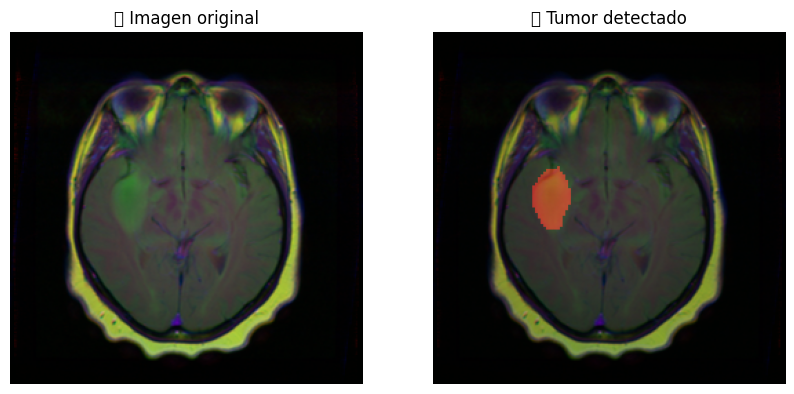

In [ ]:
original, overlay = predict_image(model, Image.open("TCGA_CS_4942_19970222_9.tif"))

# Mostrar resultado
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(original)
plt.title("üß† Imagen original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(overlay)
plt.title("üîç Tumor detectado")
plt.axis("off")

plt.show()

<ipython-input-27-9ff4bbb68ad8>:27: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-27-9ff4bbb68ad8>:27: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-27-9ff4bbb68ad8>:27: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


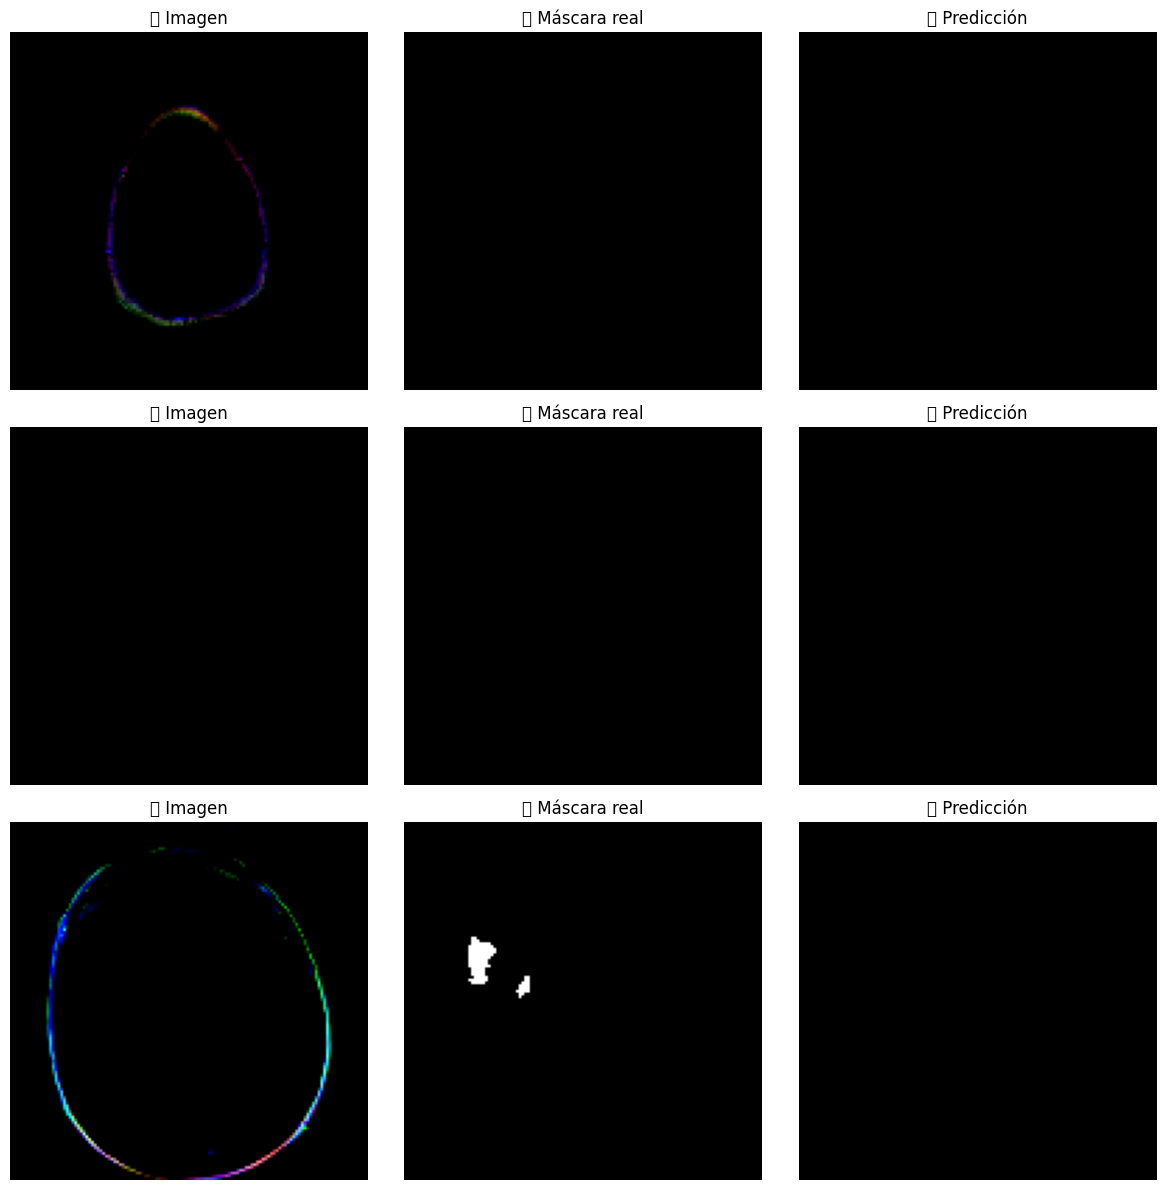

In [ ]:
#Paso 10: visualizaci√≥n de las predicciones
import random

def show_predictions(model, dataset, num=3):
    model.eval()
    indices = random.sample(range(len(dataset)), num)
    fig, axs = plt.subplots(num, 3, figsize=(12, 4 * num))

    for i, idx in enumerate(indices):
        img, mask = dataset[idx]
        with torch.no_grad():
            pred = torch.sigmoid(model(img.unsqueeze(0).to(DEVICE)))
            pred = (pred > 0.5).float().cpu().squeeze()

        axs[i, 0].imshow(img.permute(1, 2, 0).cpu())
        axs[i, 0].set_title('üß† Imagen')

        axs[i, 1].imshow(mask.squeeze().cpu(), cmap='gray')
        axs[i, 1].set_title('‚úÖ M√°scara real')

        axs[i, 2].imshow(pred, cmap='gray')
        axs[i, 2].set_title('üîÆ Predicci√≥n')

        for j in range(3):
            axs[i, j].axis('off')

    plt.tight_layout()
    plt.show()

# Visualizar predicciones con el modelo entrenado
show_predictions(model, val_dataset)